# Lab 6: Optimizing neural networks using L2 regularization, Dropout and early stopping

Aman Parasher
RA2111047010157


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [ ]:
#importing the dataset
from sklearn import datasets
data = datasets.load_iris()

X = data.data
y = data.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Build the neural network model
#using DROPOUT ans L2 Regularization

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Using EARLY STOPPING
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Fit the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)


Epoch 1/50
4/4 [==============================] - 0s 39ms/step - loss: 0.3397 - accuracy: 0.9000 - val_loss: 0.2097 - val_accuracy: 0.9667
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 0.2963 - accuracy: 0.9167 - val_loss: 0.2088 - val_accuracy: 0.9333
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.3110 - accuracy: 0.9250 - val_loss: 0.2041 - val_accuracy: 0.9667
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 0.3392 - accuracy: 0.8917 - val_loss: 0.2031 - val_accuracy: 0.9333
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.3249 - accuracy: 0.9167 - val_loss: 0.1996 - val_accuracy: 0.9667
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.3372 - accuracy: 0.8917 - val_loss: 0.1933 - val_accuracy: 0.9667
Epoch 7/50
4/4 [==============================] - 0s 21ms/step - loss: 0.2987 - accuracy: 0.9250 - val_loss: 0.1903 - val_accuracy: 0.9667
Epoch 8/50
4/4 [===========

In [ ]:
print("Test Loss : ",loss)
print("Test accuracy: ",accuracy*100)


Test Loss : 2.3099
Test accuracy:  100.0


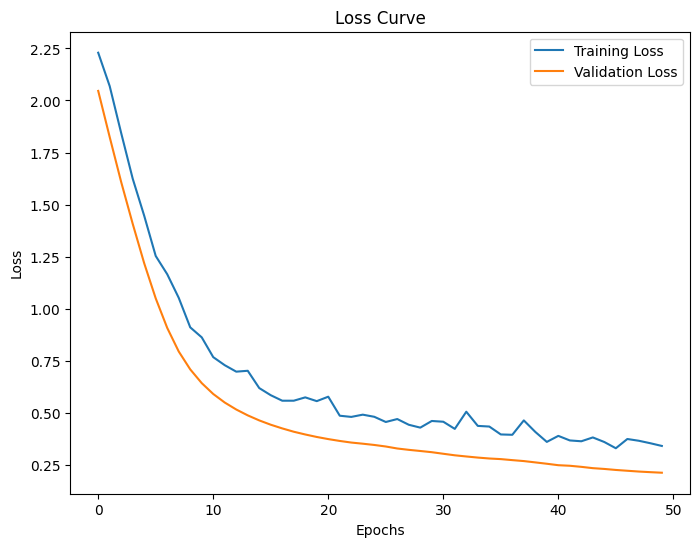

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()